In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def analytics(r,theta,a,c,rho0):
    G=6.67e-8
    M=2e33
    alpha=2.236e26
    
    numer=r*(a**2-c**2)*np.sin(2*theta)
    denom=(r**2-(a**2-c**2)*np.cos(theta)**2)**2
    
    return(alpha*a*a*c*rho0*numer/denom)

In [14]:
COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

In [16]:
data=pd.read_csv('../Analytics/ana_num_res.csv',names=["Index","Theta","r","Numerics"])
data=data.drop(0)
data=data.drop('Index',axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


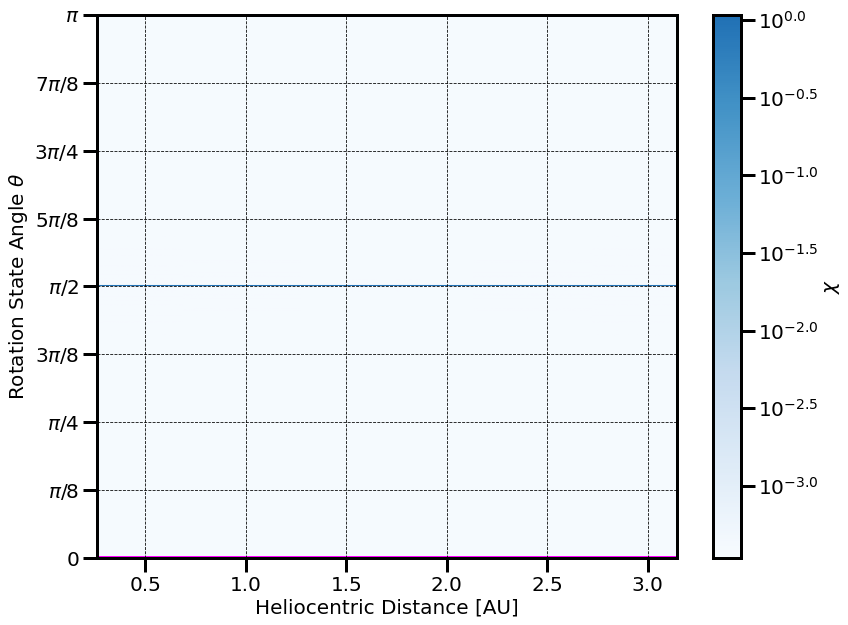

In [17]:
import matplotlib.colors as colors

def ferr(x,y): 
    err=np.abs((x-y)/x)
    
    fails=np.where(np.isnan(err))
    err[fails]=np.abs((x-y)[fails])
    
    #fails=np.where(np.isinf(err))
    #err[np.isinf(err)]=(x-y)[fails]
    return(err)

cmap=colors.LinearSegmentedColormap.from_list("test",plt.get_cmap('Blues')(np.linspace(0.0,0.75,100)))
cmap.set_bad('magenta',1)

#fig, ax = plt.subplots(figsize=(13,10))
#plt.imshow(np.log10(ratio),aspect='auto',extent=[np.min(r)/1.49e13,np.max(r)/1.49e13,0,np.pi],cmap=new_cmap,
          #origin='lower')

num=data['Numerics'].to_numpy()
r=data['r'].to_numpy()
theta=data['Theta'].to_numpy()
ana=analytics(r,theta,11500,1900,.5)

import matplotlib.ticker as ticker

ana=np.reshape(ana,(500,500))
num=np.reshape(num,(500,500))

ratio=ferr(ana,num)
ratio[ratio==0]=1e-16

#ratio=np.log10(ratio)

ratio=ferr(ana,num)
ratio=np.log10(ratio)

fig, ax = plt.subplots(figsize=(13,10))
plt.imshow(ratio,aspect='auto',extent=[np.min(r)/1.49e13,np.max(r)/1.49e13,0,np.pi],origin='lower',cmap=cmap)
plt.xlabel("Heliocentric Distance [AU]")
plt.ylabel("Rotation State Angle $\\theta$")
ax.set_yticks(np.pi*np.linspace(0,1,9))

ax.set_yticklabels([0,"$\\pi/8$","$\\pi/4$","$3\\pi/8$","$\\pi/2$",
                   "$5\\pi/8$","$3\\pi/4$","$7\\pi/8$","$\\pi$"])

def fmt(x, pos):
    return r'$10^{{{}}}$'.format(x)

plt.colorbar(format=ticker.FuncFormatter(fmt),label="$\chi$")

plt.grid(c='k',ls='--')
plt.savefig('validation_ratio.pdf',
           bbox_inches='tight',dpi=300)
